Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/05_Classification'
except ImportError as e:
    pass

# More Classifiers & Tuning of hyper-parameters

In this exercise we will have a look at some additional classifiers and how to tune the hyper-parameters.

In machine learning, the differentiation between parameters and hyper-parameters is the following:
- parameters: the values learnt by the estimator (e.g. splits for decision trees, probabilities for naive bayes)
- hyper-parameters: the values which are passed to an estimator from outside (e.g. K for KNN, max depth for decision trees)


## New Classifiers

You have learned about several new classifiers in the lecture.
The following gives you an overview of their implementations in scikit-learn.

### Naive Bayes

[Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) is implemented in different variations in scikit-learn.

The [```GaussianNB``` class](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) implements the Naive Bayes classifier for continious (numeric) features.
The [```MultinomialNB``` class](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) implements the Naive Bayes classifier for discrete (categorical) features.


### Artificial Neural Networks

Scikit-learn implements simple [Neural Network Classifiers](https://scikit-learn.org/stable/modules/neural_networks_supervised.html). 
For large-scale applications or deep learning, however, other libraries should be preferred.

The [```MLPClassifier``` class](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) implements a multi-layer perceptron classifier that is trained using backpropagation.

### Support Vector Machines

[Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html) are also implemented in different variations.

We will be using the [```SVC``` class](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) which implements support vector classification.
An alternative implementation with different parameters is the [```NuSVC``` class](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html).

## Hyper-Parameter Tuning

We will use the iris dataset for the introduction again:

In [2]:
import pandas as pd
iris = pd.read_csv("iris.csv")
iris_data = iris.drop('Name', axis=1)
iris_target = iris['Name']

### Grid Search

We perform the hyper-parameter tuning using [Grid Search](http://scikit-learn.org/stable/modules/grid_search.html).
A grid search allows you to specify all hyper-parameter values that you want to test, and will then evaluate all possible combinations of these values.
It is implemented in the [```GridSearchCV``` class](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) in scikit-learn.
This class behaves exactly like an estimator.
If its ```fit()``` function is called, all hyper-parameter combinations are evaluated.

Parameters:
- ```estimator```: an estimator (e.g. a decision tree)
- ```parameter_grid```: the parameters that should be evaluated as a dictionary
    - the key is the name of the hyper-parameter
    - the value is a list of possible values
    - example: ```{'param_a':[1,2,3], 'param_b':[7,8,9] }```
- ```scoring```: the metric that should be used to evaluate the parameter settings (can be 'accuracy' or other scores)
- ```cv```: specifies how to perform cross validation (default: 3-fold cross validation)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# create an estimator
knn_estimator = KNeighborsClassifier()

# specify the parameter grid
parameters = {
    'n_neighbors': range(2, 9)
}

# specify the cross validation
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# create the grid search instance
grid_search_estimator = GridSearchCV(knn_estimator, parameters, scoring='accuracy', cv=stratified_10_fold_cv, return_train_score=False)

# run the grid search
grid_search_estimator.fit(iris_data,iris_target)

# print the results of all hyper-parameter combinations
results = pd.DataFrame(grid_search_estimator.cv_results_)
display(results)
    
# print the best parameter setting
print("best score is {} with params {}".format(grid_search_estimator.best_score_, grid_search_estimator.best_params_))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001562,0.004686,0.003121,0.006241,2,{'n_neighbors': 2},1.0,0.933333,1.0,0.933333,0.866667,0.866667,1.0,1.0,1.000000,0.866667,0.946667,0.058119,7
1,0.001562,0.004686,0.002213,0.004873,3,{'n_neighbors': 3},1.0,1.000000,1.0,0.933333,0.866667,0.866667,1.0,1.0,1.000000,0.933333,0.960000,0.053333,3
2,0.001562,0.004687,0.001562,0.004686,4,{'n_neighbors': 4},1.0,1.000000,1.0,0.933333,0.866667,0.866667,1.0,1.0,1.000000,0.933333,0.960000,0.053333,3
3,0.004686,0.007159,0.000655,0.001966,5,{'n_neighbors': 5},1.0,1.000000,1.0,0.933333,0.866667,0.866667,1.0,1.0,0.933333,0.933333,0.953333,0.052068,6
4,0.002023,0.003125,0.002018,0.003117,6,{'n_neighbors': 6},1.0,1.000000,1.0,0.933333,0.933333,0.933333,1.0,1.0,0.933333,0.933333,0.966667,0.033333,2
5,0.002023,0.003126,0.002018,0.003116,7,{'n_neighbors': 7},1.0,1.000000,1.0,0.933333,0.933333,0.933333,1.0,1.0,0.933333,1.000000,0.973333,0.032660,1
6,0.002828,0.003513,0.001419,0.002392,8,{'n_neighbors': 8},1.0,0.933333,1.0,0.933333,0.933333,0.933333,1.0,1.0,0.933333,0.933333,0.960000,0.032660,5


best score is 0.9733333333333334 with params {'n_neighbors': 7}


## Recap

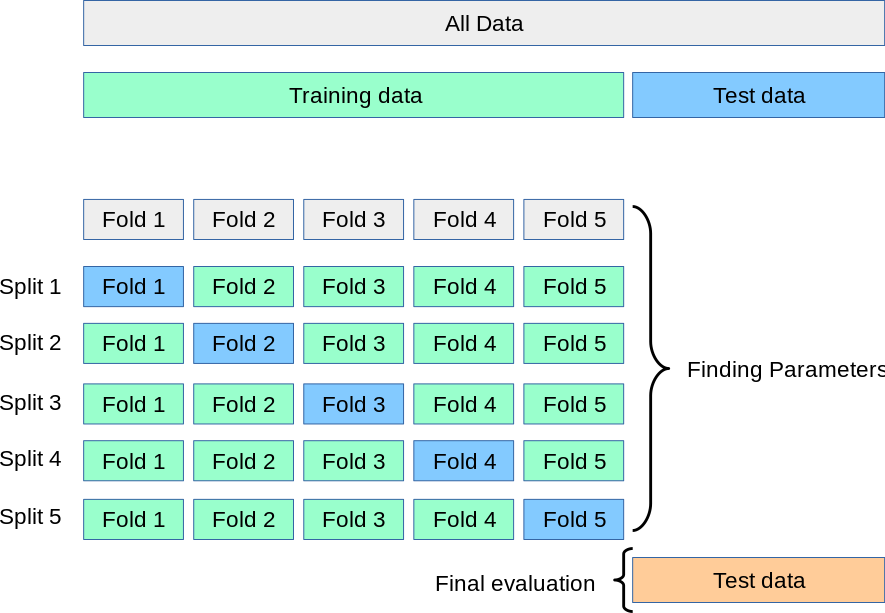

### Model Selection with Nested Cross Validation

The performance of each hyper-parameter setting is determined using cross validation.
But if we now select the best setting based on these results, we make a decision for a hyper-parameter setting based on the results on the used dataset.
Methodologically, this is the same situation as during fitting: the learning algorithm makes a decision for the model parameters based on the training split(s), and the grid search makes a decision for the hyper-parameters based on the test split(s).
This means, after choosing a hyper-parameter setting, we need to evaluate how good this decision performs on unseen data.
As in the model fitting case, we can do this either using a train/test split or using a [nested cross validation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html).

If we use a train/test split, we run the grid search (and its internal cross validation) on the training set and evaluate our chosen model on the test set (by calling the ```predict()``` function of the grid search estimator).
If we use a nested cross validation, we run a cross validation using the grid search as estimator (which performs another cross validation internally).

Note: Remember that the ```cross_val_score()``` function only performs an evaluation and does not produce a model.
So if you want to create a model that you can apply to unseen data or want to know the selected parameters, you must call the ```fit()``` function of the estimator (in this case the grid search)!

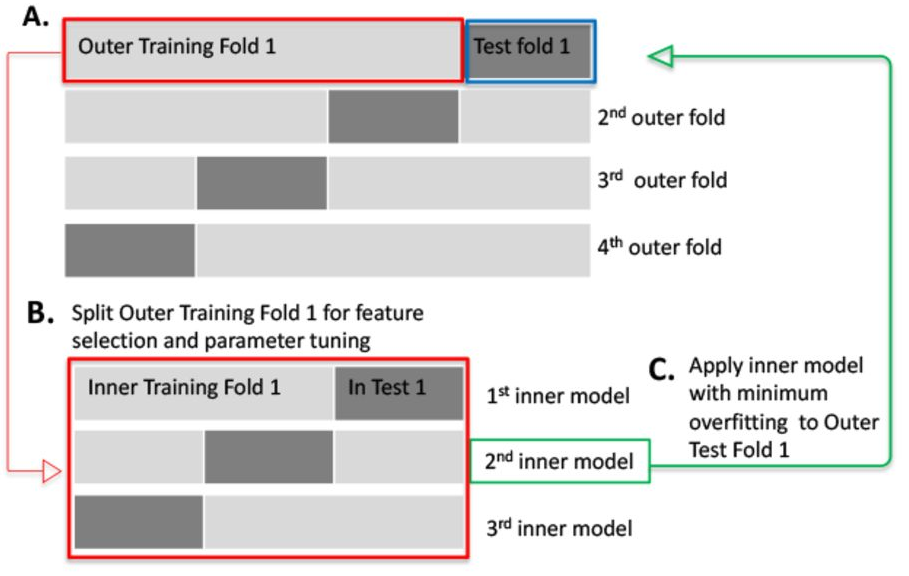

In [4]:
from sklearn.model_selection import cross_val_score

# use only 5 folds here, as we only have 50 examples per class in the iris dataset!
nested_cv_score = cross_val_score(grid_search_estimator, iris_data, iris_target, cv=5, scoring='accuracy')

display(nested_cv_score.mean())

grid_search_estimator.fit(iris_data,iris_target)
display(grid_search_estimator.best_params_)

0.9666666666666668

{'n_neighbors': 7}

## Grid Search using Pipelines

Often, we need preprocessing steps before we perform a grid search, or even want to optimise the hyper-parameters of our preprocessing steps.
In these cases, we set up a pipeline and run the grid search on all steps.

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# create the pipeline
transform = StandardScaler()
estimator = KNeighborsClassifier()
pipeline = Pipeline(steps=[ ('normalisation', transform), ('classification', estimator) ])


# specify the parameter grid
parameters = {
    'normalisation__with_mean': [ True, False],
    'normalisation__with_std': [ True, False],
    'classification__n_neighbors': range(2, 9)
}

# create the grid search instance
grid_search_estimator = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=10)

accuracy_best = cross_val_score(grid_search_estimator, iris_data, iris_target, cv=5, scoring='accuracy', n_jobs=-1)
print("Accuracy = {}%".format(accuracy_best.mean() * 100.0))

grid_search_estimator.fit(iris_data, iris_target)
display(grid_search_estimator.best_params_)

Accuracy = 97.33333333333334%


{'classification__n_neighbors': 5,
 'normalisation__with_mean': True,
 'normalisation__with_std': False}

## Using Cost-Based Evaluation

If we are interested in a use-case specific evaluation, we can define a cost matrix and calculate the overall cost of our model.

In [6]:
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

# specify the order of the classes in the confusion matrix
label_order = [ 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ]

# define a cost matrix
costs = [
            [ 0, 1, 2],
            [ 1, 0, 1],
            [ 2, 1, 0]
        ]

# define the cost function
def cost_function(y_true, y_pred): 
    cm = confusion_matrix(y_true, y_pred, labels=label_order)
    s = 0
    for i in range(len(cm)):
        s += np.dot(cm[i], costs[i])
    return s

# define a cost scorer
cost_score = make_scorer(cost_function, greater_is_better=False)

# create the grid search instance
grid_search_estimator = GridSearchCV(pipeline, parameters, scoring=cost_score, cv=10)

score_best = cross_val_score(grid_search_estimator, iris_data, iris_target, cv=5, scoring=cost_score, n_jobs=-1)
print("Cost = {}".format(-score_best.mean()))

grid_search_estimator.fit(iris_data, iris_target)
display(grid_search_estimator.best_params_)

Cost = 0.8


{'classification__n_neighbors': 3,
 'normalisation__with_mean': True,
 'normalisation__with_std': False}

## Classifier comparison on artificial data

[Code producing this image](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

[Larger image](https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)

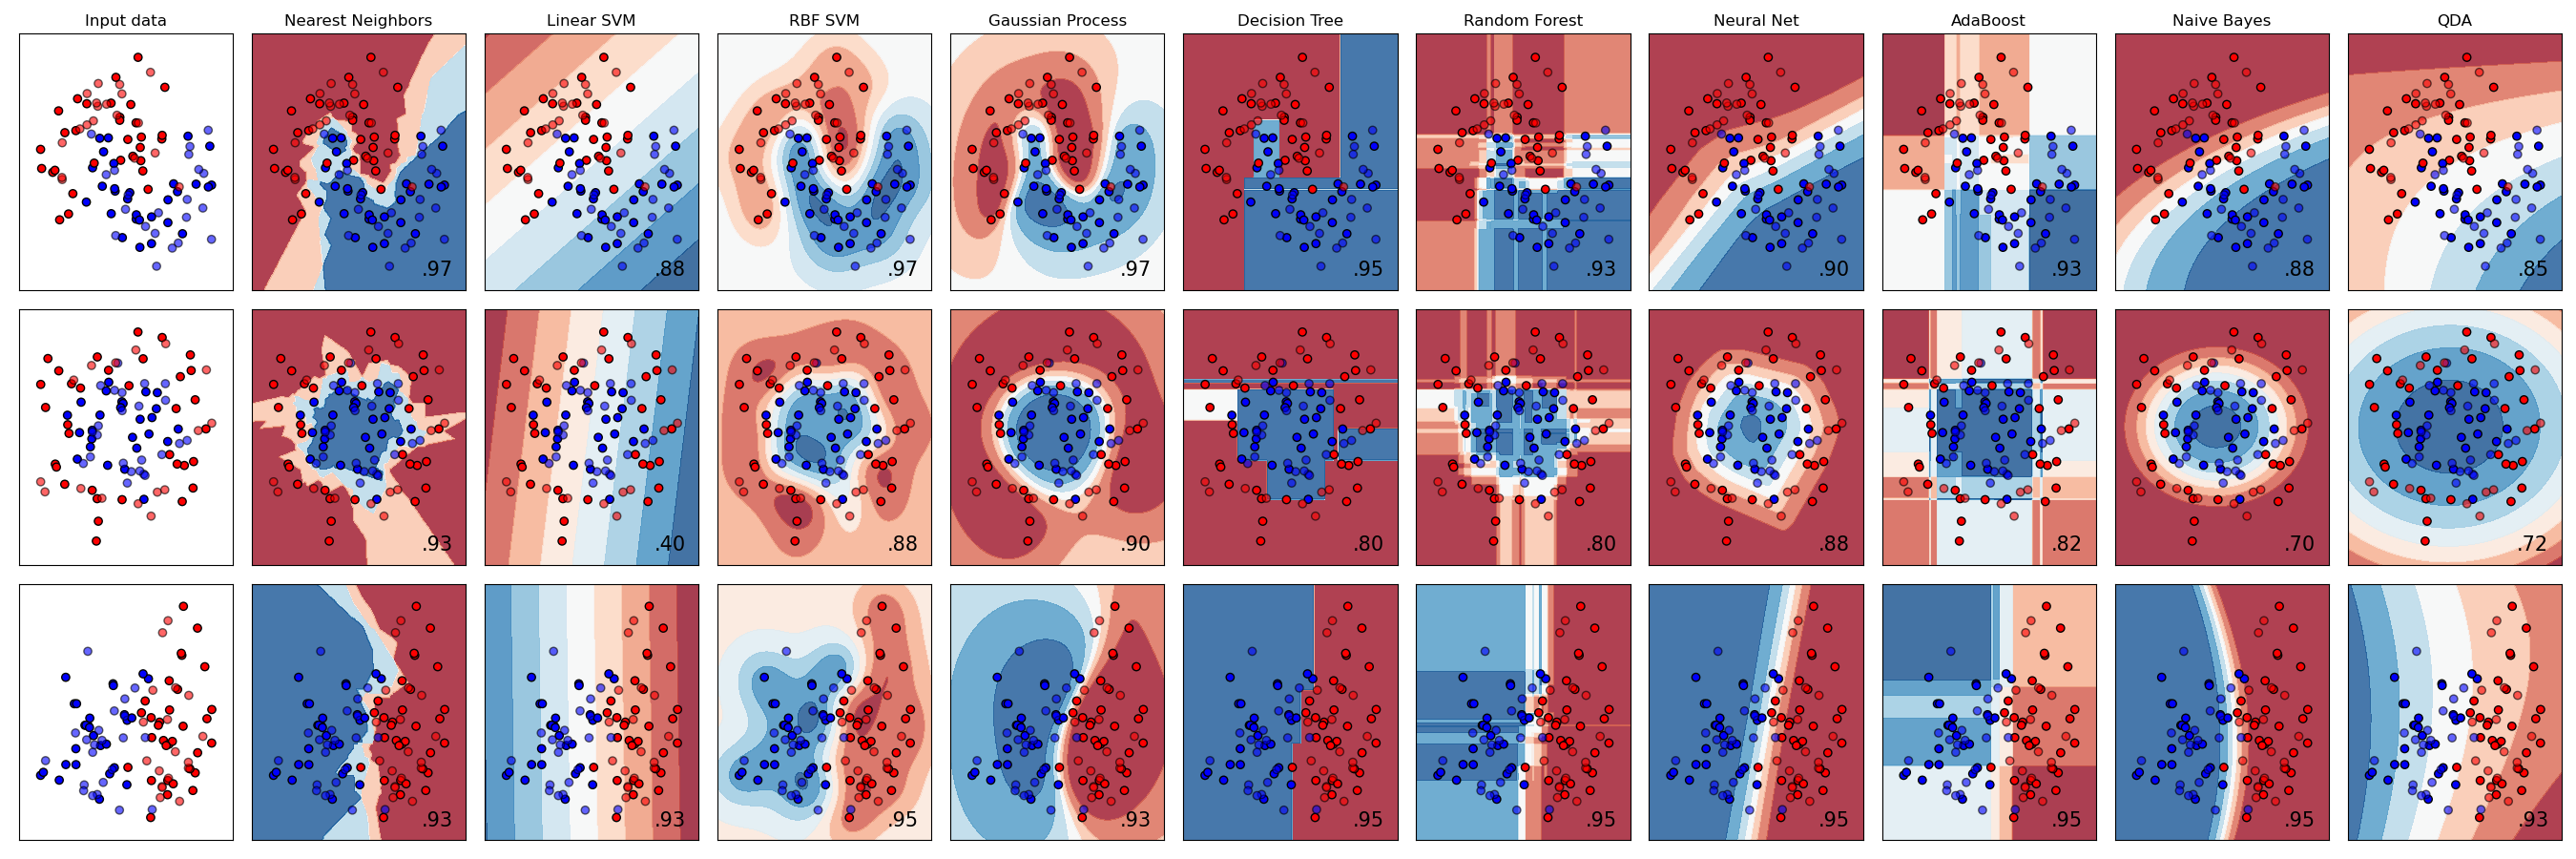